**This code snippet is connecting this google colab page with the google drive where the image dataset is stored.**


In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
print(1)
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
print(1)
!apt-get update -qq 2>&1 > /dev/null
print(1)
!apt-get -y install -qq google-drive-ocamlfuse fuse
print(1)
from google.colab import auth
print(1)
auth.authenticate_user()
print(1)
from oauth2client.client import GoogleCredentials
print(1)
creds = GoogleCredentials.get_application_default()
print(1)
import getpass
print(1)
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
print("done")

vcode = getpass.getpass()
print(1)
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
1
1
1
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130912 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.4-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.4-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.4-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
1
1
1
1
1
1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
done
··········
1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Ao

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive


**moving to fashion directory where concerned files are present**

In [0]:
!ls
%cd ./drive/fashion
!ls

adc.json  drive  sample_data
/content/drive/fashion
 data		    inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
 data2		    model.h5
 data3		    resnet50_weights_tf_dim_ordering_tf_kernels.h5
 drive		    test_resnet50.ipynb
'fashion dataset'


** ***use  this code in case upper code hangs while connecting with drive. But  if upper code works fine don't run this portion of code.***

In [0]:
# Load the Drive helper and mount in case above code did not work
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/fashion"

 data		    inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
 data2		    model.h5
 drive		    resnet50_weights_tf_dim_ordering_tf_kernels.h5
'fashion dataset'   test_resnet50.ipynb


## HUEW PRODUCT CATEGORY CLASSIFICATION USING CNN

So here we are solving the Huew problem statement of identifying the category of the product using convolutional neural networks image classification from deep learning. As a model choice in deep CNN Resnet50 model along with its trained weights have been used. Transfer learning with our pre-trained Resnet50 model have been applied, later on a small self-created neural network was trained accordingly to perform the multi-class classification task i.e. wether an image of a product belongs to one cartegory or the other. So, the important steps followed are:



*   Importing the important dependencies
*   Preprocessing tasks that includes feature extraction of image dataset using pre-trained Resnet50 model


*   Training and Validation of our small neural network for binary classification
*   Evaluation of our model

**Some of the definitions**









**Transfer Learning**:Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.We can use transfer learning to speed up training and improve the performance of our deep learning model.

**ResNet50 model :** ResNet-50 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 50 layers deep and can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images.

**Approach used in this problem**


So for the sake of easiest explanation for this approach, I would say that here transfer learning has been used to solve this problem where a pre-trained model ResNet50 with it's already trained weights are in action. Now since this ResNet50 classifies an image into 50 classes but I have to classify an image into just 25 classes so the very last layer of ResNet50 model was removed.

So, all the used layers of ResNet50 are basically extracting all the important features from our dataset images. After extraction of those features, these are passed into self-created neural Network(consisting of various Dense layer and different Relu and Softmax Activation Layes) and training the Network for optimized weights. Now, after training for optimized weights, Network learnt to classify an image into different classes and Hence we got an Image classifier.

**Why did I choose Transfer Learning**

The reason behind choosing transfer learning is that the limited capacity of CPU of normal computers can not handle training of deep CNN which consists of 50 or more than 50 layers. Also entire training of the architecture of CNN even on GPU of Google Colab (which provides 12 GB RaM) will take a hell lot of time(might more than a day) or it can run out of RAM. So transfer learning basically comes with pre-trained weights and also since our problem resembles to the pre-trained model(classification of image) so most of the layers of pre-trained model will be doing our job of extracting features from image. So we can use all those layer to directly extract feature without training those layers for optimized weights.


**Why did I choose ResNet50 model** 

In a study done by Rajaraman et al., they used pre-trained convolutional neural networks to classify images in the same dataset I am using. They compared six models: AlexNet, VGG-16, ResNet-50, Xception, DenseNet-121, and a custom model they built. Their results showed that the ResNet-50 model consistently showed the most accurate results on this specific database — it also had the highest performance in metrics such as MCC and the F-1 score.


# Task 1: Importing the important dependencies

So firstly, I have chosen Keras as my framework. Accordingly, different functions and dependencies from Keras is imported for smooth running of my model. Some of the important imports are as follows:


*   Dump from pickle is used to store the object data to file.


*   shuffle from random basically shuffles the dataset so that every row of the dataset must have a random label for a class.
*  keras.applications.resnet50 does import resNet50 model for us that shall be used as pre-trained model for my transfer learning purpose.


*   Adam optimizer is imported to optimize our weights and learning rates etc.
*   The ModelCheckpoint callback class allows us to define where to checkpoint the model weights,how the file should named and under what circumstances to make a checkpoint of the model.
















In [0]:
from os import listdir
from pickle import dump
from pickle import load
from random import shuffle
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers.advanced_activations import LeakyReLU

import cv2
import copy

from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation, Lambda, GlobalAveragePooling2D
from keras import optimizers
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import initializers
from keras.engine import Layer, InputSpec
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import sys

Using TensorFlow backend.


#  Task 2:Preprocessing tasks for image feature extraction
Here we extract features from the available dataset and we shall be doing this by passing our dataset into pre-trained ResNet50 model. So, ResNet50 model has got 50 layers and classifies an image into 50 classes but we want to classify into 25 classes so we shall remove last layer here in this task and store all the extracted features from 49 layers into vectors. We shall do this for all training, validation and testing dataset. At the end of this task, We shall be having feature vectors of all training, validation and test data. Further in the next task, these features will be passed into our created Neural Netwok to train that network and classify an image.

**creating a list containing names of images with their corresponding label**

In [0]:
#blank list created
dataset = list()
n = [0]

In [0]:
#function for extracting image name from dataset then putting the corresponding label and finally putting into above created list
def func(directory, label):
    for name in listdir(directory):
        filename = directory + '/' + name
        lis = [filename, label]
        dataset.append(lis)
        n[0] = n[0]+1

In [0]:
main_directory = 'fashion dataset'
func(main_directory+'/Apparels-Women-Combo Sets', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Ethnic Wear-Blouses', [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Ethnic Wear-Dress Materials', [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Ethnic Wear-Dupattas', [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Ethnic Wear-Ethnic Bottoms-Harem Pants', [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Ethnic Wear-Ethnic Bottoms-Leggings n Churidars-Leggings n Jeggings', [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Ethnic Wear-Lehenga Cholis-Lehenga Cholis', [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Ethnic Wear-Saris', [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Fusion Wear-Ethnic Bottoms-Leggings n Churidars-Leggings', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Fusion Wear-Jeans n Shorts-Jeans', [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Fusion Wear-Lingerie Sleep n Swimwear-Pyjamas n Lounge Pants', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Fusion Wear-Shirts Tops n Tunics-Polos n T-Shirts', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Fusion Wear-Shirts Tops n Tunics-Tops', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Fusion Wear-Shirts Tops n Tunics-Tunics', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Lingerie n Sleepwear-Camisoles n Slips', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Lingerie n Sleepwear-Sports Bras', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Leggings n Jeggings-Leggings n Jeggings', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Shirts Tops n Tunics-Kaftans', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Shirts Tops n Tunics-Polos n T-Shirts', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Shirts Tops n Tunics-Shirts', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Shirts Tops n Tunics-Tops', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Shirts Tops n Tunics-Tunics', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Shrugs n Jackets-Shrugs', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
func(main_directory+'/Apparels-Women-Western Wear-Trousers n Capris-Trousers', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
func(main_directory+'/Apparels-Women-Winter n Seasonal Wear-Thermals-Thermal Tops', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
#shuffling the orderly stored image into list to randomize them



In [0]:
shuffle(dataset)
n[0]

11876

**We have used 80% of dataset as training, 10% as validation and 10% as testing.**

In [0]:
train = int(0.8*n[0])
dev = int(0.1*n[0])
test = int(0.1*n[0])

In [0]:
train_dataset = dataset[:train]
dev_dataset = dataset[train: train+dev]
test_dataset = dataset[train+dev:]

In [0]:
print("No. of train data points: ", len(train_dataset))
print("No. of dev data points: ",len(dev_dataset))
print("No. of test data points: ",len(test_dataset))

No. of train data points:  9500
No. of dev data points:  1187
No. of test data points:  1189


**Blank feature list for storing the image features that will be generated from our pre-trained Resnet50 model after a single feed-forward task.**

In [0]:
feature_train =  list()
label_train = list()
feature_dev =  list()
label_dev = list()
feature_test =  list()
label_test = list()

**Using a Resnet50 model from keras with weights downloaded from kaggle website and removing last layer.**

We have removed the last layer( i.e. softmax layer with 1000 hidden units or neurons) in the original Resnet50 model and so our output will be the output vector generated by a previous layer before the last layer of Resne50. Here, in the transfered Resnet50 model the output generated will be a vector of size 2048.

By using the feature_extaction() function discussed below we will find out the feature vector associated with every image into our train, test and dev set and store them in the lists declared just above.

In [0]:
#using ResNet50 model with their weights
model = ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels.h5')
#poping up or removing last layer
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)

W0620 05:37:53.692507 139975473870720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 05:37:53.723923 139975473870720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 05:37:53.734084 139975473870720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0620 05:37:53.770875 139975473870720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0620 05:37:53.771725

**Extracting features of Images using the Transferred Resnet50 model**

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Here, We are extracting features from images using Transferred ResNet50. The output vector generated by the transferred layer contains the image feature information and is futher stored in their corresponding lists.

In [0]:
def extract_features(dataset, name):
    
    i = 1;
    for filename, label in dataset:
        
        #loading the image
        img = image.load_img(filename, target_size=(224, 224))
        #converting image to array
        x = image.img_to_array(img)
        #expanding the dimension
        x = np.expand_dims(x, axis=0)
        #preprocessing for Resnet50 model input
        x = preprocess_input(x)
        
        # get features
        feature = model.predict(x)
        
        #for train
        if name =='train':
            feature_train.append(feature)
            label_train.append(label)
        # for dev
        elif name =='dev':
            feature_dev.append(feature)
            label_dev.append(label)
        #for test
        else:
            feature_test.append(feature)
            label_test.append(label)
            
        if i%100 == 0:
            print("completed: %s", i)
        
        i=i+1
    print("===============")
        

**Calling the extract_feature function for train, dev(validation), test**

In [0]:
extract_features(train_dataset, 'train')
extract_features(dev_dataset, 'dev')
extract_features(test_dataset, 'test')

**Storing the feature extracted and their corresponding labels to our hard-disk**

In [0]:
dump(feature_train, open('./data/feature_train.pkl', 'wb'))
dump(label_train, open('./data/label_train.pkl', 'wb'))
dump(feature_dev, open('./data/feature_dev.pkl', 'wb'))
dump(label_dev, open('./data/label_dev.pkl', 'wb'))
dump(feature_test, open('./data/feature_test.pkl', 'wb'))
dump(label_test, open('./data/label_test.pkl', 'wb'))

**In case of already saved features, we can access them back using the code snippet below**

In [0]:
feature_train = load(open('data/feature_train.pkl', 'rb'))
label_train = load(open('data/label_train.pkl', 'rb'))
feature_dev = load(open('data/feature_dev.pkl', 'rb'))
label_dev = load(open('data/label_dev.pkl', 'rb'))
feature_test = load(open('data/feature_test.pkl', 'rb'))
label_test = load(open('data/label_test.pkl', 'rb'))
#label_test = load(open('/content/drive/My Drive/fashion/data/label_test.pkl', 'rb'))

**Convert the feature and label list to numpy array and reshape it accordingly as is we shall be requiring it to pass as an input to our small neural network, especially modelled for our classification task**

In [0]:
X_train = np.array(feature_train).reshape((train, 2048))
Y_train = np.array(label_train)

In [0]:
X_dev = np.array(feature_dev).reshape((dev, 2048))
Y_dev = np.array(label_dev)

In [0]:
test = 1189
X_test = np.array(feature_test)
X_test.shape

(1189, 1, 2048)

In [0]:
X_test = np.array(feature_test).reshape((test, 2048))
Y_test = np.array(label_test)

In [0]:
X_train.shape

(9500, 2048)

## **Task 3: Training and validation of our Neural Network for multi class classification task**

Input given to this model will be the feature vector that is generated from our transferred Resnet50 model. Here, in this model named fashion_model we have used 3 dense layers. First two are hidden dense layers and the last is output softmax layer with 25 hidden units. Our input is passed to the first hidden layer with hidden units equal to 2048, and then the second hidden layer with the number of hidden units equal to 256 and finally the output layer with 25 units for multi class classification. Also to fine tune our model, we have batch normalization, dropout and leaky relu(as activation) in between. Softmax for last layer is activation function.These activation functions basically introduces non-linearity in our classification function and this non-linearity is very important as it saves our Neural Network from becoming a normal regression model. I have used Adam optimizer for fast optimization of weights and the loss function that I have used is categorical_crossentropy.

**Reason to choose categorical_crossentropy as loss function**

So, basically for binary cassification problems, we either choose Hinge loss or categorical_crossentropy as our loss function. Hinge loss is generally preffered in SVM problems where the target values are in the set {-1, 1}. While Cross entropy is one of ancestor probabilistic decision making where the target values are in the set {0, 1}. Now Hinge loss simplifies the mathematics needed for SVM thus leading to computational effective results while maximazing the error. If we need real time decisions with a lesser accuracy then we depend on it. But Cross entropy minimizes the error but computationally ineffective.

$$Loss = -\sum_{i =1}^{c}ylog\hat{y}+(1-y)log(1-\hat{y})$$
So since we decided to give more priority to accuracy than to computational effectiveness hence here preffered categorical_crossentropy as loss function.

During our model fitting process we have used **100 epochs** to train our weights with batch size of 200 image feature vector. We have used a callback to maintain the checkpoint to save our model as it get improved on validation loss.

**What loss function and callback are doing together**

We have used the **batch size of 200** (i.e. 200 image feature vectors will be given as an input in one forward-pass), which will be given as an input to our fashion_model in one forward-pass and then backpropagation will do its job by optimizing the weights. Then when all our train image feature vector is passed through the model i.e. it will be 1 epoch. Basically every 1 epoch of training dataset is optimising weight for our fashion_model. And then after, we are checking our newly optimized weights on validation dataset with the help of loss function( loss function that we have used here is categorical_crossentropy). So, if error is minimized comparing to the previous iteration on validation dataset then callback is saving our model with newly optimized weight named as model.h5, if loss on our validation data is not minimized with respect to previous iteration then we do not save these new weights and confine ourselves with previous model and weights only. This is what **ModelCheckpoint ()** does for us.We checked our model on this regularization technique and also on **EarlyStopping()** where if for a specified no. of epochs, if validation loss does not improve then training process stops.
The metrics used is f1 score and since Keras does not provide a pre-defined function for the same hance we have manually written snippet for it.

And for this, the parameter that we have used in our model.fit() is callback().

**our self-created Neural Network**

In [0]:
#creating our own Neural Network
def fashion_model(input_shape):
    
    X_input = Input(input_shape)
    
    X = Dense(2048, name = "fc")(X_input)
    X = BatchNormalization()(X)
    X = LeakyReLU(0.2)(X)
    
    X = Dense(256, name = 'fc0')(X)
    
    X = LeakyReLU(0.2)(X)
    X = Dropout(0.5)(X)
    
    X = Dense(25, activation = 'softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name = "fashion_category")
    
    return model

In [0]:
model = fashion_model((X_train.shape[1],))

W0620 05:39:55.277045 139975473870720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**function for f1 score**

In [0]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
#sgd = optimizers.SGD(lr=0.001)
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = [f1])

W0620 05:40:10.196123 139975473870720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
from keras.callbacks import EarlyStopping

In [0]:
filename = 'model.h5'
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
#checkpoint = [EarlyStopping(monitor='val_loss', patience=2, verbose = 1, mode = "auto", baseline = None),
             #ModelCheckpoint(filename, monitor='val_loss', save_best_only=True)]

In [0]:
history = model.fit(x = X_train, y = Y_train, epochs = 100, batch_size = 128, validation_data=(X_test, Y_test), callbacks=[checkpoint])

W0620 05:40:20.187140 139975473870720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9500 samples, validate on 1189 samples
Epoch 1/100
9500/9500 [==============================] - 3s 280us/step - loss: 0.7246 - f1: 0.7994 - val_loss: 0.2610 - val_f1: 0.9083
Epoch 2/100
9500/9500 [==============================] - 1s 67us/step - loss: 0.2442 - f1: 0.9192 - val_loss: 0.2775 - val_f1: 0.9062
Epoch 3/100
9500/9500 [==============================] - 1s 66us/step - loss: 0.1609 - f1: 0.9458 - val_loss: 0.2056 - val_f1: 0.9268
Epoch 4/100
9500/9500 [==============================] - 1s 65us/step - loss: 0.1157 - f1: 0.9629 - val_loss: 0.3178 - val_f1: 0.9071
Epoch 5/100
9500/9500 [==============================] - 1s 67us/step - loss: 0.0873 - f1: 0.9705 - val_loss: 0.2059 - val_f1: 0.9263
Epoch 6/100
9500/9500 [==============================] - 1s 66us/step - loss: 0.0691 - f1: 0.9724 - val_loss: 0.2446 - val_f1: 0.9225
Epoch 7/100
9500/9500 [==============================] - 1s 65us/step - loss: 0.0742 - f1: 0.9728 - val_loss: 0.3285 - val_f1: 0.9192
Epoch 8/100
9

**visualising train and validation loss over no. of epochs**

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_f1', 'loss', 'f1'])

In [0]:
import matplotlib.pyplot as plt

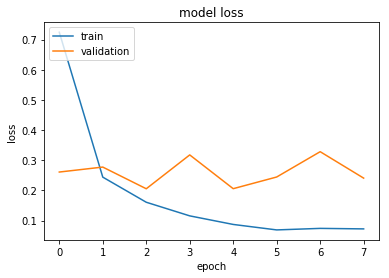

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Task 4: Model Evaluation**

Now, in this last task, We worked on calculating different performance metrics that we got through this model.

We evaluated the trained fashion model on test data and got an **accuracy of around 93%**.

Also, We chose **f1 score** as evaluation metric because in diesease detection problem, its very important to have a look on how many correct predictions we are doing out of total predictions.  So, since **f1 score** gives us a single numeric value, so we calculated that one also.

$$precision = \frac{(true\ positive)}{(total\ pridicted\ positive)}$$

$$recall = \frac{(true\ positive)}{(total\ actual\ positive)}$$

$$f1 score = \frac{(2*recall*precision)}{(precision+recall)}$$


We plotted confusion metrics also to have a visualisation of how many correct classifications are being done among categories.

 We also plotted classification report and precision score.

**calculating accuracy**

In [0]:
pred = model.evaluate(x = X_dev, y = Y_dev)

1187/1187 [==============================] - 0s 71us/step


In [0]:
#checking accuracy on test data
print("Accuracy: ", pred[1])

Accuracy:  0.9300615267283593


**plotting condusion metrics**

In [0]:
p = model.predict(X_dev)
pred_label = np.matrix.round(p)

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

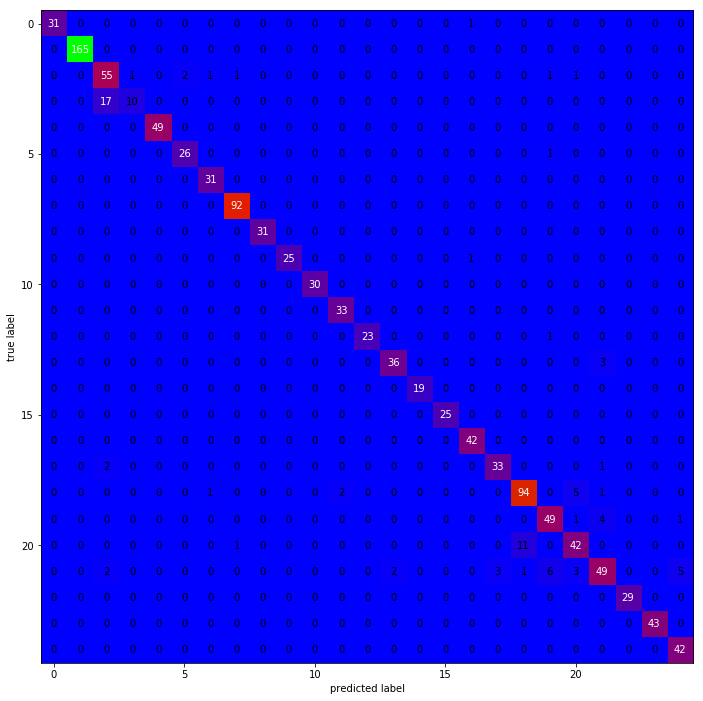

In [0]:
import matplotlib.pyplot as plt
cm = confusion_matrix(np.argmax(Y_dev, axis=1), np.argmax(p, axis=1), binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12,12), cmap='brg')
plt.show()

**calculating f1-score**

In [0]:
from sklearn.metrics import f1_score

In [0]:
prediction = pred_label[:,0]

actual = Y_dev[:,0]

In [0]:
#printing f1-score
print(f1_score(actual, prediction, average = "weighted"))

0.9991510360982467


**calculating classification report**

In [0]:
from sklearn.metrics import classification_report
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      0.97      0.98        32

    accuracy                           1.00      1187
   macro avg       1.00      0.98      0.99      1187
weighted avg       1.00      1.00      1.00      1187



**calculating precision_score**

In [0]:
from sklearn.metrics import precision_score
print(precision_score(actual, prediction, average = "weighted"))


0.999158268788461
